In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%pylab inline
import numpy as np
import cv2;
%matplotlib inline
%pylab inline

def rgb_from_jpg_fn(path):
  return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


# Image filtering

Now we want to do some basic filtering of the images.

In particular, let's say we want to avoid hitting duckies.

We then need to highlight our duckies in the image.

Let's load a test image.

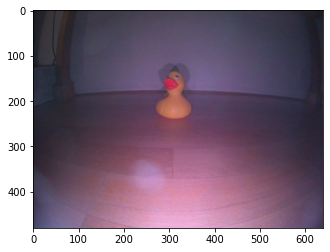

In [2]:
fn = 'big-duck-03.jpg'
image = rgb_from_jpg_fn(fn)
imshow(image);

Let's now convert it to [HSV color space](https://en.wikipedia.org/wiki/HSL_and_HSV) so that it is easier to filter by colors.


In [3]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

In OpenCV, the convention is the following:

* Hue is usually measured in degrees, 0 to 360, as shown in [this scale](./hue.png). However OpenCV uses a scale 0 to 179 - multiply by 2 to get the actual Hue in degree. (so to get a hue of 180 you have to tell 90 to OpenCV.
* S and V are from 0 to 255.

We now apply a simple image processing technique to highlight the region corresponding to a certain color.


We define a region in HSV space with the following lower/upper bounds:


In [4]:
lower_hsv = np.array([171, 140, 0])
upper_hsv = np.array([179, 200, 255])

The two arrays have 3 components: H(ue), S(aturation), V(value).

The first array are the lower bounds; the second array are the upper bounds.

This means that we are going to select the pixels that have:

* Hue between OpenCV value 171 and 179, which are regular Hue values 342 to 358.
* Saturation between 140 and 200.
* Value between 0 and 255.



The *hue* is closest to what we intuitively call "color" and the one to use to do simple processing.

This is how to do the filtering of the image and show the result:

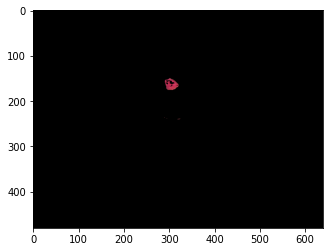

In [5]:
# Returns a matrix of 0 or 1 that satisfy the constraint
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

# Get a "masked image"
masked = cv2.bitwise_and(image, image, mask=mask)
imshow(masked);

The bounds we put by default highlight the beak. But we want the yellow of the duckie!

## Gradients

Gradients can be used to easily emphasize specific parts of an image

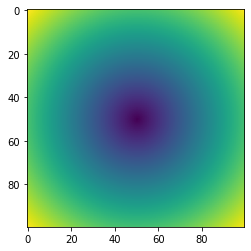

In [6]:
height = 100
width = 100
Y, X = np.ogrid[:height, :width]

center_x = 50
center_y = 50
dist_from_center = np.sqrt((X - center_x)**2 + (Y - center_y)**2)

imshow(dist_from_center)

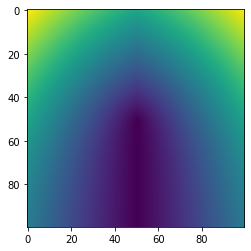

In [7]:
Y, X = np.ogrid[:height, :width]
gradient = np.sqrt((X - center_x)**2 + (Y - center_y)**2) + abs(X - center_x) + abs(Y - height)
imshow(gradient)

The values in this gradient aren't very helpful, lets rescale these points to be between 0 and 1

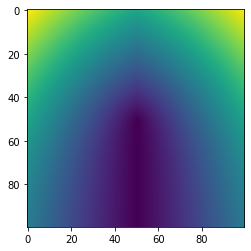

In [8]:
def rescale(n, lower1, upper1, lower2, upper2):
    return (n - lower1) / (upper1 - lower1) * (upper2 - lower2) + lower2
    
maxNum = np.max(gradient)
minNum = np.min(gradient)

for i in range(gradient.shape[0]):
  for j in range(gradient.shape[1]):
    gradient[i][j] = rescale(gradient[i][j], minNum, maxNum, 0, 1)

imshow(gradient)

Now with this gradient we can multiply any mask by it and it will increase the values of points near points of interest. We can use this to detect duckies close to the duckiebot, how can we change the previous code cell to do this?

## Activity

Your task now is to change those numbers above so that we highlight the duckies.

For this we suggest to use:

1. [This online color picker](https://pinetools.com/image-color-picker) to click around and get familiar with what color corresponds to which HSV values. (You can use any other tool, the link is just for reference.)